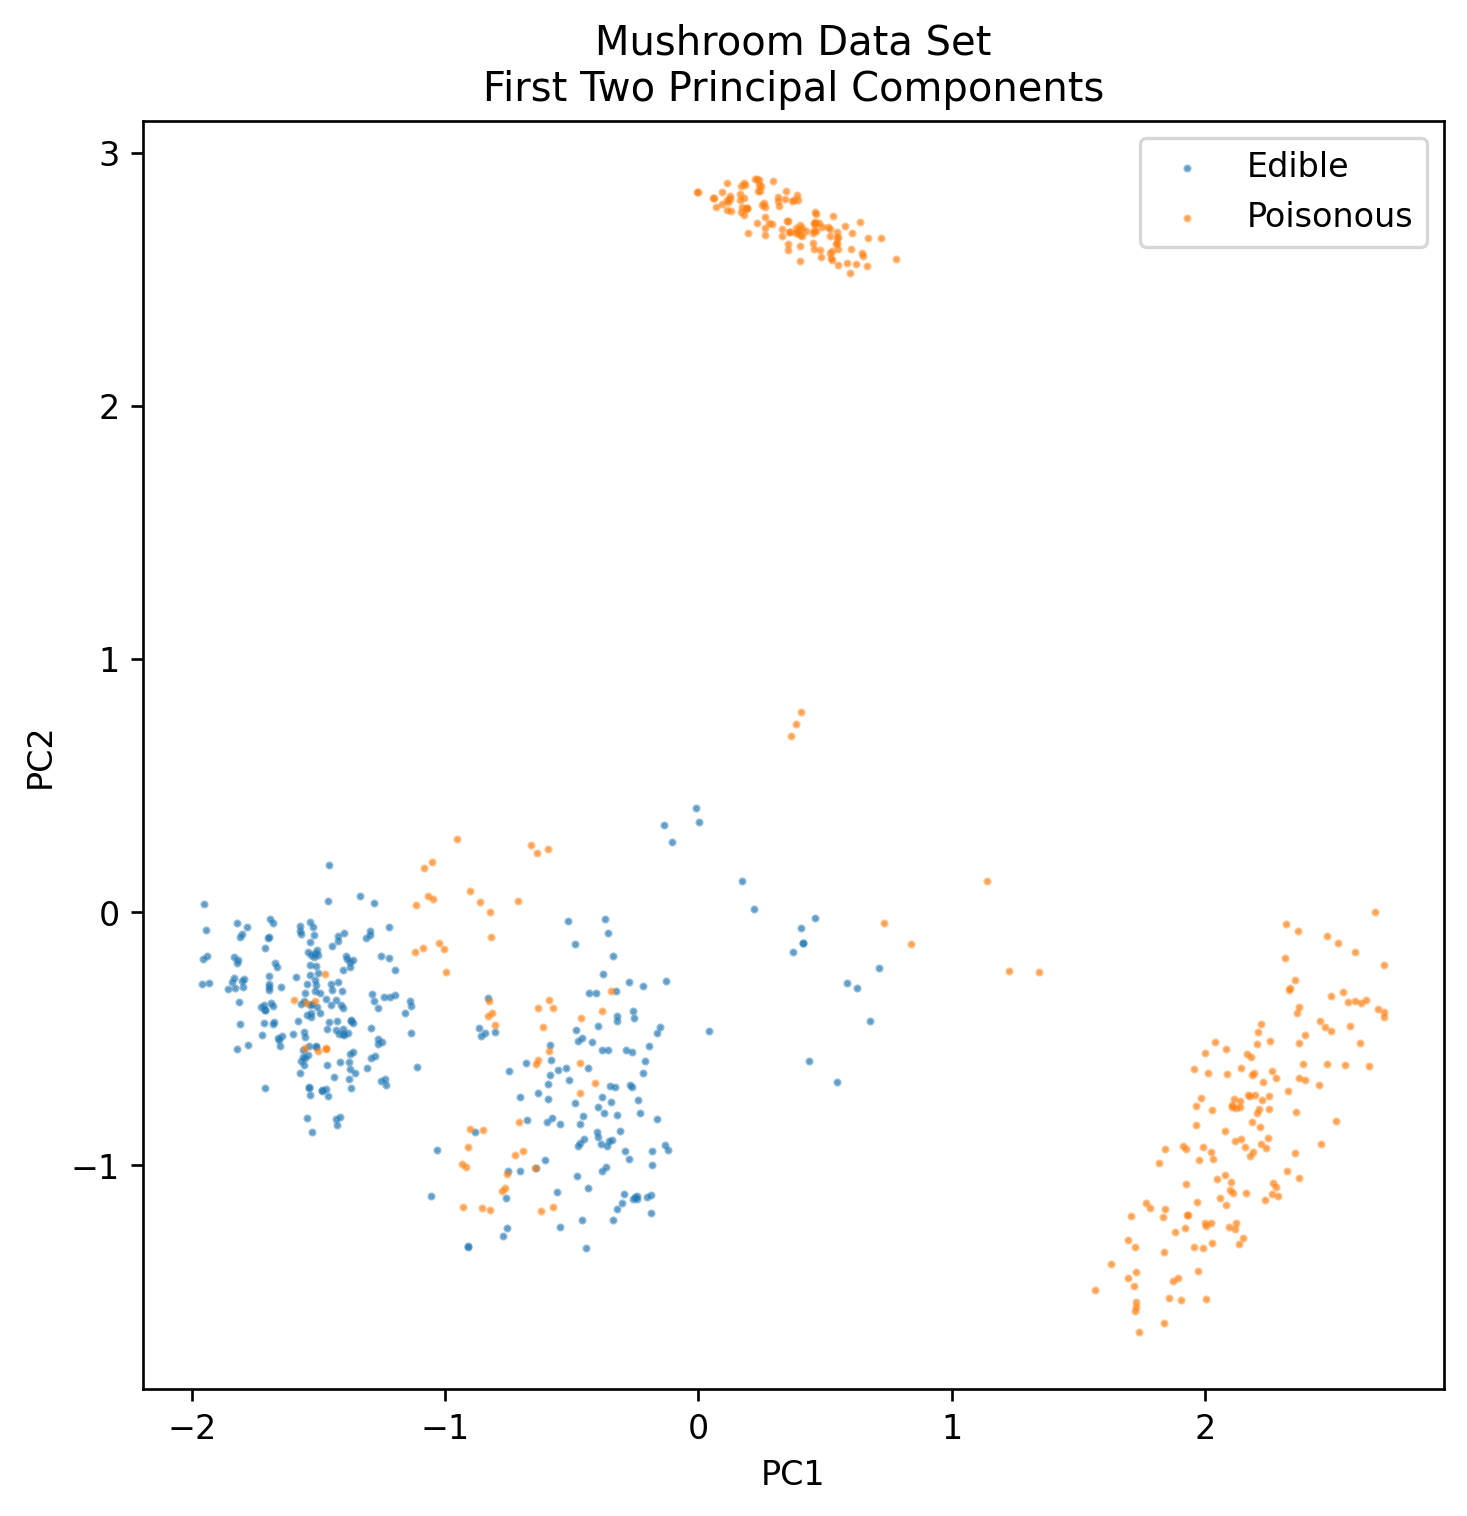

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [7]:
ds = pd.read_csv('mushrooms.csv')
dat = ds.values

print (dat.shape)

headers = list(ds.columns.values)

(8124, 23)


In [8]:
l = pp.LabelEncoder()
l.fit(dat[:, 0])
dataa = l.transform(dat[:, 0])

for ix in range(1, dat.shape[1]):
    le = pp.LabelEncoder()
    le.fit(dat[:, ix])
    y = le.transform(dat[:, ix])
    dataa = np.vstack((dataa , y))
    
data = dataa.T

cate = data[:, 0] #One hot encoding for Neural Network implementation

print(data.shape)

(8124, 23)


In [9]:
split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [15]:
#Logistic Regression
lr = LR(n_jobs=-1)

start = datetime.datetime.now()
classifier=lr.fit(x_train, y_train)
end = datetime.datetime.now()

print( "Training Time : ", end-start)

start = datetime.datetime.now()
score = lr.score(x_test, y_test)
end = datetime.datetime.now()

print ("Testing Time : ", end-start)

print ("Accurcy : ", score*100 )



Training Time :  0:00:00.952558
Testing Time :  0:00:00.002004
Accurcy :  89.29230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Features most indicative of a poisonous mushroom wrt Decision Tree Model :  spore-print-color


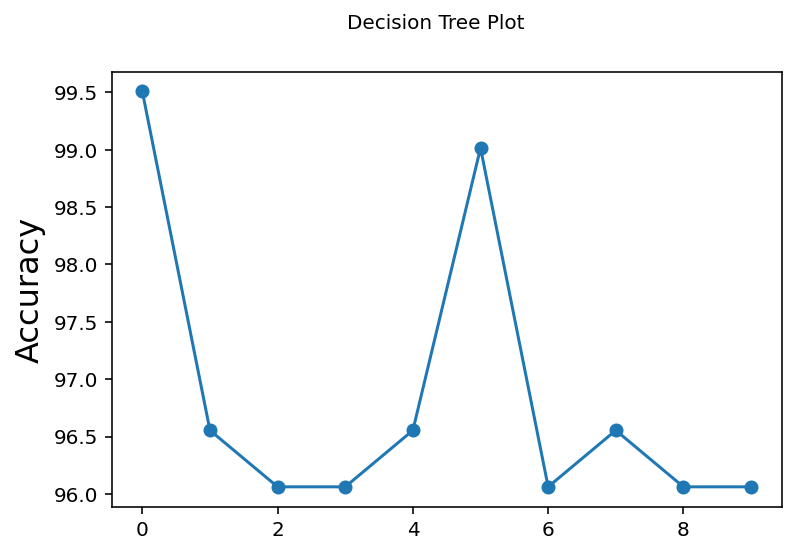

In [18]:
#Decision Tree
acc = []
ans = []

for ix in range(10):
    dt = DTC()
    
    start = datetime.datetime.now()
    dt.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = dt.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    tem = dt.feature_importances_
    ans.append(tem)
    #print "\n"
temp = [] 
for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))
    
mode = max(set(temp), key=temp.count) 
print ("Features most indicative of a poisonous mushroom wrt Decision Tree Model : ", headers[mode+1])

plt.figure(0)
plt.suptitle('Decision Tree Plot', fontsize=10)
plt.plot(acc, '-o')
plt.ylabel('Accuracy', fontsize=16)
plt.show()

Features most indicative of a poisonous mushroom wrt kNN :  spore-print-color


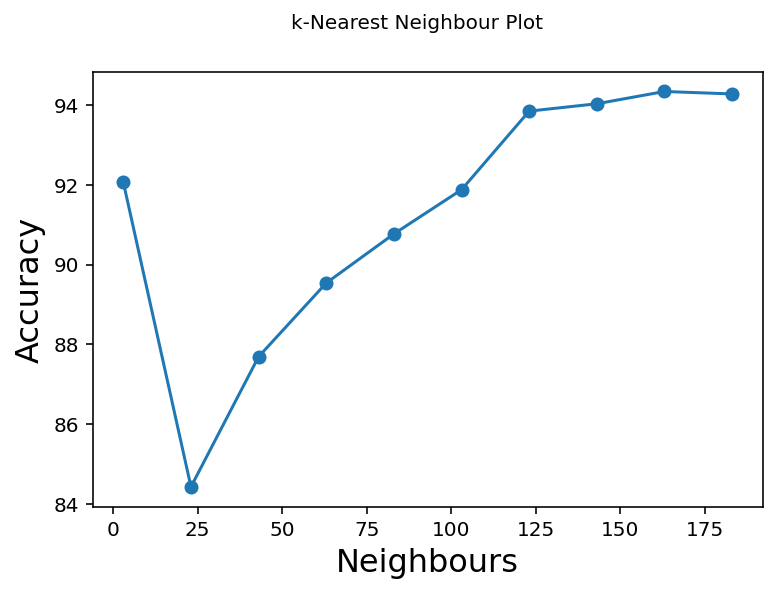

In [19]:
#KNN
acc = []
ans = []
neighbours = []

for ix in range(3, 200, 20):
    neighbours.append(ix)

for ix in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[ix], n_jobs=-1)
    
    start = datetime.datetime.now()
    knn.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = knn.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    temp = dt.feature_importances_
    ans.append(temp)
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print ("Features most indicative of a poisonous mushroom wrt kNN : ", headers[mode+1])

plt.figure(2)
plt.suptitle('k-Nearest Neighbour Plot', fontsize=10)
plt.plot(neighbours, acc, '-o')
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

In [22]:
#Neural Networks-
y = np_utils.to_categorical(cate)
Y_train = y[:split]
Y_test = y[split:]

In [23]:
model = Sequential()

model.add(Dense(11, input_shape=(22,)))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                253       
_________________________________________________________________
activation_1 (Activation)    (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 60        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 325
Trainable params: 325
Non-trainable params: 0
________________________________________________________

In [24]:
hist = model.fit(x_train, Y_train,
         nb_epoch=70,
         shuffle=True,
         batch_size=128,
         validation_data=(x_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 6499 samples, validate on 1625 samples
Epoch 1/70
 128/6499 [..............................] - ETA: 8s - loss: 2.3586 - accuracy: 0.3750

1536/6499 [======>.......................] - ETA: 0s - loss: 2.0323 - accuracy: 0.4089

4480/6499 [===================>..........] - ETA: 0s - loss: 1.5800 - accuracy: 0.4373

5760/6499 [=========================>....] - ETA: 0s - loss: 1.4746 - accuracy: 0.4613

6499/6499 [==============================] - 0s 59us/step - loss: 1.4317 - accuracy: 0.4685 - val_loss: 0.4578 - val_accuracy: 0.7754


Epoch 2/70
 128/6499 [..............................] - ETA: 1s - loss: 0.8678 - accuracy: 0.5703

3712/6499 [================>.............] - ETA: 0s - loss: 0.8898 - accuracy: 0.5628

5632/6499 [========================>.....] - ETA: 0s - loss: 0.8360 - accuracy: 0.5943

6499/6499 [==============================] - 0s 27us/step - loss: 0.8170 - accuracy: 0.6049 - val_loss: 0.3346 - val_accuracy: 0.8911


Epoch 3/70
 128/6499 [..............................] - ETA: 0s - loss: 0.6687 - accuracy: 0.6719

2432/6499 [==========>...................] - ETA: 0s - loss: 0.5899 - accuracy: 0.7249

6016/6499 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.7552



6499/6499 [==============================] - 0s 31us/step - loss: 0.5364 - accuracy: 0.7563 - val_loss: 0.2622 - val_accuracy: 0.9508


Epoch 4/70
 128/6499 [..............................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8047

1920/6499 [=======>......................] - ETA: 0s - loss: 0.4538 - accuracy: 0.8047

4352/6499 [===================>..........] - ETA: 0s - loss: 0.4452 - accuracy: 0.8081

5504/6499 [========================>.....] - ETA: 0s - loss: 0.4399 - accuracy: 0.8105

6499/6499 [==============================] - 0s 31us/step - loss: 0.4311 - accuracy: 0.8147 - val_loss: 0.2273 - val_accuracy: 0.9705


Epoch 5/70
 128/6499 [..............................] - ETA: 0s - loss: 0.3734 - accuracy: 0.8125

 768/6499 [==>...........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8242

3584/6499 [===============>..............] - ETA: 0s - loss: 0.3902 - accuracy: 0.8225

6499/6499 [==============================] - 0s 31us/step - loss: 0.3778 - accuracy: 0.8274 - val_loss: 0.2040 - val_accuracy: 0.9680


Epoch 6/70
 128/6499 [..............................] - ETA: 1s - loss: 0.3559 - accuracy: 0.8281

2560/6499 [==========>...................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8371

3584/6499 [===============>..............] - ETA: 0s - loss: 0.3458 - accuracy: 0.8365

6499/6499 [==============================] - 0s 33us/step - loss: 0.3423 - accuracy: 0.8412 - val_loss: 0.1966 - val_accuracy: 0.9717


Epoch 7/70


 128/6499 [..............................] - ETA: 1s - loss: 0.3420 - accuracy: 0.8359



2688/6499 [===========>..................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8501

3072/6499 [=============>................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8516

6400/6499 [============================>.] - ETA: 0s - loss: 0.3086 - accuracy: 0.8575

6499/6499 [==============================] - 0s 36us/step - loss: 0.3089 - accuracy: 0.8571 - val_loss: 0.1862 - val_accuracy: 0.9643


Epoch 8/70
 128/6499 [..............................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9062

1664/6499 [======>.......................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8666

3712/6499 [================>.............] - ETA: 0s - loss: 0.2904 - accuracy: 0.8739

5632/6499 [========================>.....] - ETA: 0s - loss: 0.2811 - accuracy: 0.8780

6499/6499 [==============================] - 0s 34us/step - loss: 0.2834 - accuracy: 0.8769 - val_loss: 0.1836 - val_accuracy: 0.9538


Epoch 9/70
 128/6499 [..............................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8672

1152/6499 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8767

4352/6499 [===================>..........] - ETA: 0s - loss: 0.2622 - accuracy: 0.8851

5120/6499 [======================>.......] - ETA: 0s - loss: 0.2607 - accuracy: 0.8881

6499/6499 [==============================] - 0s 34us/step - loss: 0.2613 - accuracy: 0.8884 - val_loss: 0.1803 - val_accuracy: 0.9594


Epoch 10/70
 128/6499 [..............................] - ETA: 1s - loss: 0.2682 - accuracy: 0.8828

2816/6499 [===========>..................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8988

3712/6499 [================>.............] - ETA: 0s - loss: 0.2458 - accuracy: 0.8971

6016/6499 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.9014

6499/6499 [==============================] - 0s 39us/step - loss: 0.2392 - accuracy: 0.9021 - val_loss: 0.1850 - val_accuracy: 0.9563


Epoch 11/70
 128/6499 [..............................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8828

2048/6499 [========>.....................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9028

3968/6499 [=================>............] - ETA: 0s - loss: 0.2290 - accuracy: 0.9068

5760/6499 [=========================>....] - ETA: 0s - loss: 0.2244 - accuracy: 0.9097

6499/6499 [==============================] - 0s 32us/step - loss: 0.2232 - accuracy: 0.9101 - val_loss: 0.1843 - val_accuracy: 0.9471


Epoch 12/70
 128/6499 [..............................] - ETA: 0s - loss: 0.2266 - accuracy: 0.9141

1024/6499 [===>..........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.9043

2432/6499 [==========>...................] - ETA: 0s - loss: 0.2307 - accuracy: 0.9104

3072/6499 [=============>................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9137

3328/6499 [==============>...............] - ETA: 0s - loss: 0.2290 - accuracy: 0.9129

4224/6499 [==================>...........] - ETA: 0s - loss: 0.2188 - accuracy: 0.9174

4864/6499 [=====================>........] - ETA: 0s - loss: 0.2133 - accuracy: 0.9190

6499/6499 [==============================] - 0s 68us/step - loss: 0.2059 - accuracy: 0.9217 - val_loss: 0.1803 - val_accuracy: 0.9483


Epoch 13/70
 128/6499 [..............................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9062

 896/6499 [===>..........................] - ETA: 0s - loss: 0.1852 - accuracy: 0.9286

2944/6499 [============>.................] - ETA: 0s - loss: 0.1855 - accuracy: 0.9348

3840/6499 [================>.............] - ETA: 0s - loss: 0.1838 - accuracy: 0.9349

5248/6499 [=======================>......] - ETA: 0s - loss: 0.1897 - accuracy: 0.9320

6499/6499 [==============================] - 0s 43us/step - loss: 0.1917 - accuracy: 0.9300 - val_loss: 0.1890 - val_accuracy: 0.9397


Epoch 14/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9375

1408/6499 [=====>........................] - ETA: 0s - loss: 0.1871 - accuracy: 0.9318

2688/6499 [===========>..................] - ETA: 0s - loss: 0.1921 - accuracy: 0.9315

5376/6499 [=======================>......] - ETA: 0s - loss: 0.1839 - accuracy: 0.9373

5632/6499 [========================>.....] - ETA: 0s - loss: 0.1814 - accuracy: 0.9380

6499/6499 [==============================] - 0s 44us/step - loss: 0.1789 - accuracy: 0.9394 - val_loss: 0.1865 - val_accuracy: 0.9422


Epoch 15/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1855 - accuracy: 0.9297

1024/6499 [===>..........................] - ETA: 0s - loss: 0.1565 - accuracy: 0.9424

3968/6499 [=================>............] - ETA: 0s - loss: 0.1662 - accuracy: 0.9430

6499/6499 [==============================] - 0s 30us/step - loss: 0.1665 - accuracy: 0.9451 - val_loss: 0.1950 - val_accuracy: 0.9311


Epoch 16/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1335 - accuracy: 0.9609

2688/6499 [===========>..................] - ETA: 0s - loss: 0.1585 - accuracy: 0.9501

3072/6499 [=============>................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9505

4992/6499 [======================>.......] - ETA: 0s - loss: 0.1513 - accuracy: 0.9501

6272/6499 [===========================>..] - ETA: 0s - loss: 0.1560 - accuracy: 0.9485

6499/6499 [==============================] - 0s 35us/step - loss: 0.1551 - accuracy: 0.9488 - val_loss: 0.2085 - val_accuracy: 0.9212


Epoch 17/70
 128/6499 [..............................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9297

2048/6499 [========>.....................] - ETA: 0s - loss: 0.1414 - accuracy: 0.9575

5120/6499 [======================>.......] - ETA: 0s - loss: 0.1408 - accuracy: 0.9549

6400/6499 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9547

6499/6499 [==============================] - 0s 29us/step - loss: 0.1398 - accuracy: 0.9548 - val_loss: 0.2456 - val_accuracy: 0.8978


Epoch 18/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1251 - accuracy: 0.9688

2432/6499 [==========>...................] - ETA: 0s - loss: 0.1337 - accuracy: 0.9535

4480/6499 [===================>..........] - ETA: 0s - loss: 0.1343 - accuracy: 0.9529

6400/6499 [============================>.] - ETA: 0s - loss: 0.1278 - accuracy: 0.9559

6499/6499 [==============================] - 0s 31us/step - loss: 0.1284 - accuracy: 0.9560 - val_loss: 0.2674 - val_accuracy: 0.8800


Epoch 19/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9297

2304/6499 [=========>....................] - ETA: 0s - loss: 0.1322 - accuracy: 0.9557

4736/6499 [====================>.........] - ETA: 0s - loss: 0.1202 - accuracy: 0.9601

6272/6499 [===========================>..] - ETA: 0s - loss: 0.1178 - accuracy: 0.9603

6499/6499 [==============================] - 0s 31us/step - loss: 0.1159 - accuracy: 0.9612 - val_loss: 0.2814 - val_accuracy: 0.8769


Epoch 20/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1251 - accuracy: 0.9453

2176/6499 [=========>....................] - ETA: 0s - loss: 0.1022 - accuracy: 0.9674

3968/6499 [=================>............] - ETA: 0s - loss: 0.1083 - accuracy: 0.9627

5760/6499 [=========================>....] - ETA: 0s - loss: 0.1074 - accuracy: 0.9642

6499/6499 [==============================] - 0s 33us/step - loss: 0.1043 - accuracy: 0.9648 - val_loss: 0.3111 - val_accuracy: 0.8578


Epoch 21/70
 128/6499 [..............................] - ETA: 0s - loss: 0.1316 - accuracy: 0.9375

2304/6499 [=========>....................] - ETA: 0s - loss: 0.0939 - accuracy: 0.9714

4864/6499 [=====================>........] - ETA: 0s - loss: 0.0921 - accuracy: 0.9704

6499/6499 [==============================] - 0s 28us/step - loss: 0.0938 - accuracy: 0.9678 - val_loss: 0.3289 - val_accuracy: 0.8462


Epoch 22/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0740 - accuracy: 0.9688

2176/6499 [=========>....................] - ETA: 0s - loss: 0.0954 - accuracy: 0.9674

5248/6499 [=======================>......] - ETA: 0s - loss: 0.0843 - accuracy: 0.9718

6400/6499 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9728

6499/6499 [==============================] - 0s 28us/step - loss: 0.0829 - accuracy: 0.9729 - val_loss: 0.3498 - val_accuracy: 0.8431


Epoch 23/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0553 - accuracy: 0.9922

3072/6499 [=============>................] - ETA: 0s - loss: 0.0757 - accuracy: 0.9753

4224/6499 [==================>...........] - ETA: 0s - loss: 0.0748 - accuracy: 0.9751

4864/6499 [=====================>........] - ETA: 0s - loss: 0.0747 - accuracy: 0.9751

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0714 - accuracy: 0.9759

6499/6499 [==============================] - 0s 43us/step - loss: 0.0726 - accuracy: 0.9755 - val_loss: 0.3800 - val_accuracy: 0.8326


Epoch 24/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0629 - accuracy: 0.9688

2432/6499 [==========>...................] - ETA: 0s - loss: 0.0703 - accuracy: 0.9753

5248/6499 [=======================>......] - ETA: 0s - loss: 0.0658 - accuracy: 0.9779

6499/6499 [==============================] - 0s 23us/step - loss: 0.0630 - accuracy: 0.9794 - val_loss: 0.3817 - val_accuracy: 0.8437


Epoch 25/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0580 - accuracy: 0.9844

1920/6499 [=======>......................] - ETA: 0s - loss: 0.0585 - accuracy: 0.9823

3712/6499 [================>.............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9814

5888/6499 [==========================>...] - ETA: 0s - loss: 0.0557 - accuracy: 0.9834

6499/6499 [==============================] - 0s 31us/step - loss: 0.0565 - accuracy: 0.9835 - val_loss: 0.4086 - val_accuracy: 0.8277


Epoch 26/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0548 - accuracy: 0.9844

1792/6499 [=======>......................] - ETA: 0s - loss: 0.0444 - accuracy: 0.9877

3200/6499 [=============>................] - ETA: 0s - loss: 0.0433 - accuracy: 0.9875

4608/6499 [====================>.........] - ETA: 0s - loss: 0.0497 - accuracy: 0.9850

6499/6499 [==============================] - 0s 38us/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.4544 - val_accuracy: 0.8037


Epoch 27/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0377 - accuracy: 0.9844

1792/6499 [=======>......................] - ETA: 0s - loss: 0.0482 - accuracy: 0.9866

4352/6499 [===================>..........] - ETA: 0s - loss: 0.0402 - accuracy: 0.9885

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0423 - accuracy: 0.9884

6499/6499 [==============================] - 0s 32us/step - loss: 0.0424 - accuracy: 0.9878 - val_loss: 0.4688 - val_accuracy: 0.7963


Epoch 28/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0886 - accuracy: 0.9609

2688/6499 [===========>..................] - ETA: 0s - loss: 0.0407 - accuracy: 0.9896

4608/6499 [====================>.........] - ETA: 0s - loss: 0.0394 - accuracy: 0.9900

6499/6499 [==============================] - 0s 28us/step - loss: 0.0382 - accuracy: 0.9898 - val_loss: 0.4381 - val_accuracy: 0.8172


Epoch 29/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000

2048/6499 [========>.....................] - ETA: 0s - loss: 0.0331 - accuracy: 0.9937

4224/6499 [==================>...........] - ETA: 0s - loss: 0.0333 - accuracy: 0.9915

6400/6499 [============================>.] - ETA: 0s - loss: 0.0342 - accuracy: 0.9908



6499/6499 [==============================] - 0s 30us/step - loss: 0.0342 - accuracy: 0.9908 - val_loss: 0.4561 - val_accuracy: 0.8111


Epoch 30/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0542 - accuracy: 0.9922

2560/6499 [==========>...................] - ETA: 0s - loss: 0.0321 - accuracy: 0.9934

4096/6499 [=================>............] - ETA: 0s - loss: 0.0333 - accuracy: 0.9924

5632/6499 [========================>.....] - ETA: 0s - loss: 0.0327 - accuracy: 0.9925

6499/6499 [==============================] - 0s 34us/step - loss: 0.0321 - accuracy: 0.9922 - val_loss: 0.4179 - val_accuracy: 0.8271


Epoch 31/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0319 - accuracy: 0.9922

2176/6499 [=========>....................] - ETA: 0s - loss: 0.0316 - accuracy: 0.9926

5120/6499 [======================>.......] - ETA: 0s - loss: 0.0316 - accuracy: 0.9924

5888/6499 [==========================>...] - ETA: 0s - loss: 0.0300 - accuracy: 0.9929

6499/6499 [==============================] - 0s 36us/step - loss: 0.0297 - accuracy: 0.9926 - val_loss: 0.4628 - val_accuracy: 0.8129


Epoch 32/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0271 - accuracy: 0.9922

2304/6499 [=========>....................] - ETA: 0s - loss: 0.0282 - accuracy: 0.9926

4352/6499 [===================>..........] - ETA: 0s - loss: 0.0252 - accuracy: 0.9938

6499/6499 [==============================] - 0s 27us/step - loss: 0.0263 - accuracy: 0.9932 - val_loss: 0.3999 - val_accuracy: 0.8394


Epoch 33/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0182 - accuracy: 1.0000

1152/6499 [====>.........................] - ETA: 0s - loss: 0.0274 - accuracy: 0.9922

3456/6499 [==============>...............] - ETA: 0s - loss: 0.0257 - accuracy: 0.9936

5632/6499 [========================>.....] - ETA: 0s - loss: 0.0245 - accuracy: 0.9929

6499/6499 [==============================] - 0s 32us/step - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.4464 - val_accuracy: 0.8228


Epoch 34/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000

1152/6499 [====>.........................] - ETA: 0s - loss: 0.0192 - accuracy: 0.9974

3584/6499 [===============>..............] - ETA: 0s - loss: 0.0220 - accuracy: 0.9944

5504/6499 [========================>.....] - ETA: 0s - loss: 0.0222 - accuracy: 0.9945

6499/6499 [==============================] - 0s 31us/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.4207 - val_accuracy: 0.8363


Epoch 35/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0188 - accuracy: 1.0000

1792/6499 [=======>......................] - ETA: 0s - loss: 0.0228 - accuracy: 0.9944

3584/6499 [===============>..............] - ETA: 0s - loss: 0.0207 - accuracy: 0.9950

5376/6499 [=======================>......] - ETA: 0s - loss: 0.0197 - accuracy: 0.9952

6499/6499 [==============================] - 0s 35us/step - loss: 0.0202 - accuracy: 0.9951 - val_loss: 0.4293 - val_accuracy: 0.8302


Epoch 36/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0181 - accuracy: 1.0000

2304/6499 [=========>....................] - ETA: 0s - loss: 0.0226 - accuracy: 0.9931

4736/6499 [====================>.........] - ETA: 0s - loss: 0.0196 - accuracy: 0.9951

6499/6499 [==============================] - 0s 26us/step - loss: 0.0189 - accuracy: 0.9960 - val_loss: 0.4211 - val_accuracy: 0.8382


Epoch 37/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0340 - accuracy: 0.9922

1920/6499 [=======>......................] - ETA: 0s - loss: 0.0205 - accuracy: 0.9948

3584/6499 [===============>..............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9964

5376/6499 [=======================>......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9961

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0181 - accuracy: 0.9963

6499/6499 [==============================] - 0s 38us/step - loss: 0.0182 - accuracy: 0.9963 - val_loss: 0.4160 - val_accuracy: 0.8363


Epoch 38/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0185 - accuracy: 0.9922

2560/6499 [==========>...................] - ETA: 0s - loss: 0.0166 - accuracy: 0.9969

3840/6499 [================>.............] - ETA: 0s - loss: 0.0157 - accuracy: 0.9971

6016/6499 [==========================>...] - ETA: 0s - loss: 0.0164 - accuracy: 0.9967

6499/6499 [==============================] - 0s 33us/step - loss: 0.0164 - accuracy: 0.9965 - val_loss: 0.3800 - val_accuracy: 0.8511


Epoch 39/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0166 - accuracy: 0.9922

1664/6499 [======>.......................] - ETA: 0s - loss: 0.0164 - accuracy: 0.9958

3584/6499 [===============>..............] - ETA: 0s - loss: 0.0153 - accuracy: 0.9961

5760/6499 [=========================>....] - ETA: 0s - loss: 0.0159 - accuracy: 0.9969

6499/6499 [==============================] - 0s 30us/step - loss: 0.0157 - accuracy: 0.9968 - val_loss: 0.3979 - val_accuracy: 0.8486


Epoch 40/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0202 - accuracy: 1.0000

1664/6499 [======>.......................] - ETA: 0s - loss: 0.0149 - accuracy: 0.9964

3968/6499 [=================>............] - ETA: 0s - loss: 0.0147 - accuracy: 0.9962

5248/6499 [=======================>......] - ETA: 0s - loss: 0.0146 - accuracy: 0.9968

6499/6499 [==============================] - 0s 37us/step - loss: 0.0139 - accuracy: 0.9974 - val_loss: 0.3914 - val_accuracy: 0.8529


Epoch 41/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0061 - accuracy: 1.0000

1664/6499 [======>.......................] - ETA: 0s - loss: 0.0163 - accuracy: 0.9958

3712/6499 [================>.............] - ETA: 0s - loss: 0.0140 - accuracy: 0.9976

6144/6499 [===========================>..] - ETA: 0s - loss: 0.0132 - accuracy: 0.9976

6499/6499 [==============================] - 0s 31us/step - loss: 0.0134 - accuracy: 0.9974 - val_loss: 0.3727 - val_accuracy: 0.8634


Epoch 42/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0375 - accuracy: 0.9844

2432/6499 [==========>...................] - ETA: 0s - loss: 0.0134 - accuracy: 0.9971

4096/6499 [=================>............] - ETA: 0s - loss: 0.0126 - accuracy: 0.9980

5376/6499 [=======================>......] - ETA: 0s - loss: 0.0124 - accuracy: 0.9981

6499/6499 [==============================] - 0s 34us/step - loss: 0.0122 - accuracy: 0.9980 - val_loss: 0.3443 - val_accuracy: 0.8751


Epoch 43/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0126 - accuracy: 1.0000

2048/6499 [========>.....................] - ETA: 0s - loss: 0.0127 - accuracy: 0.9980

3968/6499 [=================>............] - ETA: 0s - loss: 0.0126 - accuracy: 0.9977

6016/6499 [==========================>...] - ETA: 0s - loss: 0.0118 - accuracy: 0.9980

6499/6499 [==============================] - 0s 30us/step - loss: 0.0115 - accuracy: 0.9982 - val_loss: 0.3701 - val_accuracy: 0.8695


Epoch 44/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0168 - accuracy: 1.0000

1792/6499 [=======>......................] - ETA: 0s - loss: 0.0101 - accuracy: 0.9983

3584/6499 [===============>..............] - ETA: 0s - loss: 0.0096 - accuracy: 0.9986

5632/6499 [========================>.....] - ETA: 0s - loss: 0.0103 - accuracy: 0.9982

6499/6499 [==============================] - 0s 35us/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.4011 - val_accuracy: 0.8578


Epoch 45/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0141 - accuracy: 0.9922

1920/6499 [=======>......................] - ETA: 0s - loss: 0.0106 - accuracy: 0.9974

4096/6499 [=================>............] - ETA: 0s - loss: 0.0105 - accuracy: 0.9985

6499/6499 [==============================] - 0s 28us/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.3424 - val_accuracy: 0.8818


Epoch 46/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000

2176/6499 [=========>....................] - ETA: 0s - loss: 0.0097 - accuracy: 0.9982

4096/6499 [=================>............] - ETA: 0s - loss: 0.0096 - accuracy: 0.9983

5760/6499 [=========================>....] - ETA: 0s - loss: 0.0096 - accuracy: 0.9984

6499/6499 [==============================] - 0s 35us/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.3277 - val_accuracy: 0.8929


Epoch 47/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0118 - accuracy: 1.0000

2688/6499 [===========>..................] - ETA: 0s - loss: 0.0094 - accuracy: 0.9985

4480/6499 [===================>..........] - ETA: 0s - loss: 0.0087 - accuracy: 0.9987

6499/6499 [==============================] - 0s 27us/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.3544 - val_accuracy: 0.8825


Epoch 48/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0097 - accuracy: 1.0000

1280/6499 [====>.........................] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000

3072/6499 [=============>................] - ETA: 0s - loss: 0.0079 - accuracy: 0.9990

5120/6499 [======================>.......] - ETA: 0s - loss: 0.0077 - accuracy: 0.9992

6499/6499 [==============================] - 0s 34us/step - loss: 0.0082 - accuracy: 0.9991 - val_loss: 0.3857 - val_accuracy: 0.8769


Epoch 49/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0145 - accuracy: 0.9922

2432/6499 [==========>...................] - ETA: 0s - loss: 0.0093 - accuracy: 0.9984

4736/6499 [====================>.........] - ETA: 0s - loss: 0.0083 - accuracy: 0.9987

6499/6499 [==============================] - 0s 26us/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.3270 - val_accuracy: 0.8929


Epoch 50/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0061 - accuracy: 1.0000

1536/6499 [======>.......................] - ETA: 0s - loss: 0.0076 - accuracy: 0.9993

3840/6499 [================>.............] - ETA: 0s - loss: 0.0073 - accuracy: 0.9992

5248/6499 [=======================>......] - ETA: 0s - loss: 0.0077 - accuracy: 0.9990

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 0.9992

6499/6499 [==============================] - 0s 36us/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.3395 - val_accuracy: 0.8911


Epoch 51/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000

1536/6499 [======>.......................] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000

4096/6499 [=================>............] - ETA: 0s - loss: 0.0060 - accuracy: 0.9995

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0067 - accuracy: 0.9995

6499/6499 [==============================] - 0s 27us/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.3210 - val_accuracy: 0.8954


Epoch 52/70


 128/6499 [..............................] - ETA: 1s - loss: 0.0053 - accuracy: 1.0000

2432/6499 [==========>...................] - ETA: 0s - loss: 0.0068 - accuracy: 0.9996

4224/6499 [==================>...........] - ETA: 0s - loss: 0.0063 - accuracy: 0.9995

6400/6499 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9995

6499/6499 [==============================] - 0s 35us/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.3098 - val_accuracy: 0.9015


Epoch 53/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

2944/6499 [============>.................] - ETA: 0s - loss: 0.0060 - accuracy: 0.9997

4608/6499 [====================>.........] - ETA: 0s - loss: 0.0060 - accuracy: 0.9991

6499/6499 [==============================] - 0s 25us/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.3368 - val_accuracy: 0.8923


Epoch 54/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

2048/6499 [========>.....................] - ETA: 0s - loss: 0.0058 - accuracy: 0.9995

4096/6499 [=================>............] - ETA: 0s - loss: 0.0058 - accuracy: 0.9995

6144/6499 [===========================>..] - ETA: 0s - loss: 0.0056 - accuracy: 0.9995

6499/6499 [==============================] - 0s 30us/step - loss: 0.0056 - accuracy: 0.9995 - val_loss: 0.3206 - val_accuracy: 0.8985


Epoch 55/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000

2176/6499 [=========>....................] - ETA: 0s - loss: 0.0047 - accuracy: 0.9995

4992/6499 [======================>.......] - ETA: 0s - loss: 0.0051 - accuracy: 0.9996

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.9994

6499/6499 [==============================] - 0s 30us/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.2872 - val_accuracy: 0.9077


Epoch 56/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000

2560/6499 [==========>...................] - ETA: 0s - loss: 0.0068 - accuracy: 0.9996

5632/6499 [========================>.....]

 - ETA: 0s - loss: 0.0055 - accuracy: 0.9995

6499/6499 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.3222 - val_accuracy: 0.8991


Epoch 57/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000

1792/6499 [=======>......................] - ETA: 0s - loss: 0.0049 - accuracy: 0.9994

2944/6499 [============>.................] - ETA: 0s - loss: 0.0048 - accuracy: 0.9997

4608/6499 [====================>.........] - ETA: 0s - loss: 0.0042 - accuracy: 0.9998

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0047 - accuracy: 0.9995

6499/6499 [==============================] - 0s 37us/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.2950 - val_accuracy: 0.9058


Epoch 58/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

2048/6499 [========>.....................] - ETA: 0s - loss: 0.0045 - accuracy: 0.9995

3712/6499 [================>.............] - ETA: 0s - loss: 0.0045 - accuracy: 0.9995

4480/6499 [===================>..........] - ETA: 0s - loss: 0.0045 - accuracy: 0.9996

5760/6499 [=========================>....] - ETA: 0s - loss: 0.0043 - accuracy: 0.9997

6499/6499 [==============================] - 0s 43us/step - loss: 0.0044 - accuracy: 0.9997 - val_loss: 0.3082 - val_accuracy: 0.9052


Epoch 59/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000

2560/6499 [==========>...................] - ETA: 0s - loss: 0.0050 - accuracy: 0.9996

5248/6499 [=======================>......] - ETA: 0s - loss: 0.0042 - accuracy: 0.9998

6499/6499 [==============================] - 0s 25us/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.3166 - val_accuracy: 0.9046


Epoch 60/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

2176/6499 [=========>....................] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

3456/6499 [==============>...............] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

5376/6499 [=======================>......] - ETA: 0s - loss: 0.0037 - accuracy: 0.9998

6499/6499 [==============================] - 0s 35us/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.3102 - val_accuracy: 0.9028


Epoch 61/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

2304/6499 [=========>....................] - ETA: 0s - loss: 0.0041 - accuracy: 0.9996

5376/6499 [=======================>......] - ETA: 0s - loss: 0.0037 - accuracy: 0.9998

6016/6499 [==========================>...] - ETA: 0s - loss: 0.0036 - accuracy: 0.9998

6499/6499 [==============================] - 0s 30us/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.3026 - val_accuracy: 0.9046


Epoch 62/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

2176/6499 [=========>....................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

4096/6499 [=================>............] - ETA: 0s - loss: 0.0035 - accuracy: 0.9998

6016/6499 [==========================>...] - ETA: 0s - loss: 0.0034 - accuracy: 0.9998

6499/6499 [==============================] - 0s 30us/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.2999 - val_accuracy: 0.9095


Epoch 63/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000

1792/6499 [=======>......................] - ETA: 0s - loss: 0.0036 - accuracy: 0.9994

4480/6499 [===================>..........] - ETA: 0s - loss: 0.0034 - accuracy: 0.9998

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0032 - accuracy: 0.9998

6499/6499 [==============================] - 0s 31us/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.2801 - val_accuracy: 0.9138


Epoch 64/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0105 - accuracy: 0.9922

2432/6499 [==========>...................] - ETA: 0s - loss: 0.0028 - accuracy: 0.9996

5120/6499 [======================>.......] - ETA: 0s - loss: 0.0030 - accuracy: 0.9998

6499/6499 [==============================] - 0s 26us/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.3117 - val_accuracy: 0.9058


Epoch 65/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

1152/6499 [====>.........................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

2688/6499 [===========>..................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

4608/6499 [====================>.........] - ETA: 0s - loss: 0.0030 - accuracy: 0.9998

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0029 - accuracy: 0.9998

6499/6499 [==============================] - 0s 39us/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.3011 - val_accuracy: 0.9120


Epoch 66/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000

3200/6499 [=============>................] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

4864/6499 [=====================>........] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

6499/6499 [==============================] - 0s 25us/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.2887 - val_accuracy: 0.9163


Epoch 67/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

1280/6499 [====>.........................] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000

3584/6499 [===============>..............] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

4352/6499 [===================>..........] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

6272/6499 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 0.9998

6499/6499 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.3004 - val_accuracy: 0.9157


Epoch 68/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

1920/6499 [=======>......................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

4224/6499 [==================>...........] - ETA: 0s - loss: 0.0028 - accuracy: 0.9998

5760/6499 [=========================>....] - ETA: 0s - loss: 0.0027 - accuracy: 0.9998

6499/6499 [==============================] - 0s 31us/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.3005 - val_accuracy: 0.9138


Epoch 69/70


 128/6499 [..............................] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

1664/6499 [======>.......................] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

3456/6499 [==============>...............] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

5376/6499 [=======================>......] - ETA: 0s - loss: 0.0024 - accuracy: 0.9998

6499/6499 [==============================] - 0s 33us/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.2823 - val_accuracy: 0.9175


Epoch 70/70
 128/6499 [..............................] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

 896/6499 [===>..........................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

3072/6499 [=============>................] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

5120/6499 [======================>.......] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

6499/6499 [==============================] - 0s 31us/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.2993 - val_accuracy: 0.9151


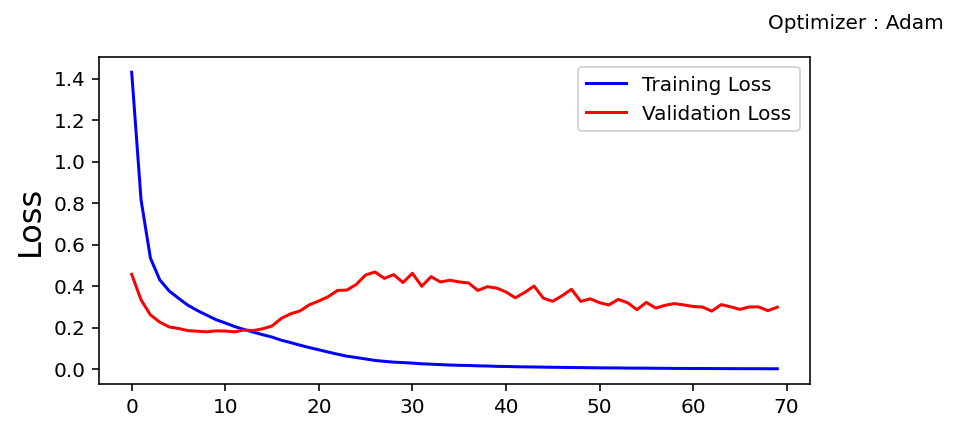

In [26]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')



In [27]:
#SVM
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
data = df.apply(LabelEncoder().fit_transform)

In [28]:
X = data.iloc[:,1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
svc = SVC()
svc.fit(X_train, y_train)
p = svc.predict(X_test)
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1266
           1       1.00      0.98      0.99      1172

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [32]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Using Simple Logistic Regression we achieve an accuracy of',np.mean(y_test==y_pred)*100)

Using Simple Logistic Regression we achieve an accuracy of 95.61115668580804


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
